## Plotting and Parsing Annotations

In [0]:
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd

In [0]:
annotations = glob('dataset-master/Annotations/*.xml')

In [0]:
df = []

In [0]:
cnt = 0
for file in annotations:
    filename = file.split('\\')[-1]
    filename =filename.split('.')[0] + '.jpg'
    row = []
    parsedXML = ET.parse(file)
    for node in parsedXML.getroot().iter('object'):
        blood_cells = node.find('name').text
        xmin = int(node.find('bndbox/xmin').text)
        xmax = int(node.find('bndbox/xmax').text)
        ymin = int(node.find('bndbox/ymin').text)
        ymax = int(node.find('bndbox/ymax').text)

        row = [filename, blood_cells, xmin, xmax, ymin, ymax]
        df.append(row)
        cnt += 1

In [0]:
data = pd.DataFrame(df, columns=['filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax'])

In [0]:
#data.to_csv("file.csv",index=False)

In [0]:
data[['filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].head(10)

,filename,cell_type,xmin,xmax,ymin,ymax
0,dataset-master/Annotations/BloodImage_00335.jpg,RBC,220,326,222,315
1,dataset-master/Annotations/BloodImage_00335.jpg,RBC,363,471,4,122
2,dataset-master/Annotations/BloodImage_00335.jpg,RBC,422,507,150,252
3,dataset-master/Annotations/BloodImage_00335.jpg,RBC,256,362,4,109
4,dataset-master/Annotations/BloodImage_00335.jpg,RBC,116,261,128,238
5,dataset-master/Annotations/BloodImage_00335.jpg,RBC,379,494,288,390
6,dataset-master/Annotations/BloodImage_00335.jpg,RBC,86,163,232,309
7,dataset-master/Annotations/BloodImage_00335.jpg,RBC,62,161,376,470
8,dataset-master/Annotations/BloodImage_00335.jpg,RBC,101,210,29,141
9,dataset-master/Annotations/BloodImage_00335.jpg,RBC,250,358,126,227


In [0]:
data[data["cell_type"]=="WBC"].head()

,filename,cell_type,xmin,xmax,ymin,ymax
11,dataset-master/Annotations/BloodImage_00335.jpg,WBC,265,490,334,480
25,dataset-master/Annotations/BloodImage_00346.jpg,WBC,162,399,274,480
36,dataset-master/Annotations/BloodImage_00319.jpg,WBC,72,327,1,209
49,dataset-master/Annotations/BloodImage_00064.jpg,WBC,28,172,129,243
61,dataset-master/Annotations/BloodImage_00290.jpg,WBC,126,387,113,295


In [0]:
import matplotlib.pyplot as plt
from matplotlib import patches
import os

In [0]:
image = plt.imread("dataset-master/JPEGImages/BloodImage_00000.jpg")

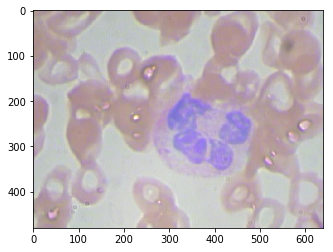

In [0]:
plt.imshow(image)

In [0]:
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import numpy as np

In [0]:
a=[]
for _,row in data[data.filename == "dataset-master/Annotations/BloodImage_00011.jpg"].iterrows():
    xmin = float(row.xmin)
    xmax = float(row.xmax)
    ymin = float(row.ymin)
    ymax = float(row.ymax)
    a.append(BoundingBox(xmin,ymax,xmax,ymin,row.cell_type))

In [0]:
a

[BoundingBox(x1=109.0000, y1=119.0000, x2=304.0000, y2=332.0000, label=WBC),
 BoundingBox(x1=364.0000, y1=201.0000, x2=453.0000, y2=279.0000, label=RBC),
 BoundingBox(x1=416.0000, y1=167.0000, x2=505.0000, y2=245.0000, label=RBC),
 BoundingBox(x1=459.0000, y1=111.0000, x2=548.0000, y2=189.0000, label=RBC),
 BoundingBox(x1=462.0000, y1=142.0000, x2=551.0000, y2=240.0000, label=RBC),
 BoundingBox(x1=505.0000, y1=163.0000, x2=576.0000, y2=240.0000, label=RBC),
 BoundingBox(x1=476.0000, y1=235.0000, x2=583.0000, y2=332.0000, label=RBC),
 BoundingBox(x1=14.0000, y1=296.0000, x2=117.0000, y2=409.0000, label=RBC),
 BoundingBox(x1=220.0000, y1=8.0000, x2=313.0000, y2=112.0000, label=RBC),
 BoundingBox(x1=342.0000, y1=48.0000, x2=435.0000, y2=152.0000, label=RBC),
 BoundingBox(x1=317.0000, y1=74.0000, x2=434.0000, y2=180.0000, label=RBC),
 BoundingBox(x1=258.0000, y1=79.0000, x2=352.0000, y2=171.0000, label=RBC),
 BoundingBox(x1=404.0000, y1=291.0000, x2=498.0000, y2=394.0000, label=RBC),
 Boun

In [0]:
bbs = BoundingBoxesOnImage(a, shape=image.shape)

In [0]:
aug_pipeline = iaa.Sequential([
    iaa.Sometimes(0.5, iaa.GaussianBlur((0, 2.0))), # apply Gaussian blur with a sigma between 0 and 3 to 50% of the images
    # apply one of the augmentations: Dropout or CoarseDropout
#     iaa.OneOf([
#         iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
#         iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
#     ]),
    # apply from 0 to 3 of the augmentations from the list
    iaa.SomeOf((0, 3),[
        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
        iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
        iaa.Fliplr(1.0), # horizontally flip
        iaa.Sometimes(0.5, iaa.CropAndPad(percent=(-0.25, 0.25)))# crop and pad 50% of the images
    ]),
    
    iaa.Sometimes(0.5, iaa.Affine(rotate=20)) # rotate 50% of the images
],
random_order=True # apply the augmentations in random order
)

# Apply augmentation pipeline to sample image
#images_aug = np.array([aug_pipeline.augment_image(image)])
image_aug, bbs_aug = aug_pipeline(image=image, bounding_boxes=bbs)
bbs_aug = bbs_aug.remove_out_of_image().clip_out_of_image()

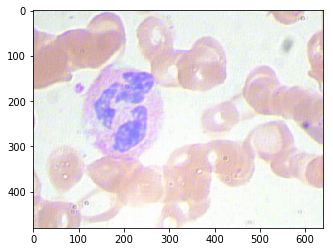

In [0]:
plt.imshow(image_aug)

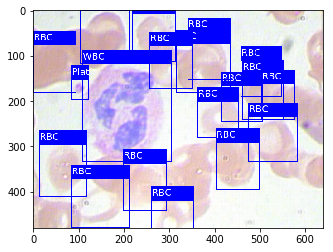

In [0]:
annot_img = bbs_aug.draw_on_image(image_aug, size=2, color=[0, 0, 255],raise_if_out_of_image=True)
plt.imshow(annot_img)

In [0]:
bbs_aug

BoundingBoxesOnImage([BoundingBox(x1=109.0000, y1=119.0000, x2=304.0000, y2=332.0000, label=WBC), BoundingBox(x1=364.0000, y1=201.0000, x2=453.0000, y2=279.0000, label=RBC), BoundingBox(x1=416.0000, y1=167.0000, x2=505.0000, y2=245.0000, label=RBC), BoundingBox(x1=459.0000, y1=111.0000, x2=548.0000, y2=189.0000, label=RBC), BoundingBox(x1=462.0000, y1=142.0000, x2=551.0000, y2=240.0000, label=RBC), BoundingBox(x1=505.0000, y1=163.0000, x2=576.0000, y2=240.0000, label=RBC), BoundingBox(x1=476.0000, y1=235.0000, x2=583.0000, y2=332.0000, label=RBC), BoundingBox(x1=14.0000, y1=296.0000, x2=117.0000, y2=409.0000, label=RBC), BoundingBox(x1=220.0000, y1=8.0000, x2=313.0000, y2=112.0000, label=RBC), BoundingBox(x1=342.0000, y1=48.0000, x2=435.0000, y2=152.0000, label=RBC), BoundingBox(x1=317.0000, y1=74.0000, x2=434.0000, y2=180.0000, label=RBC), BoundingBox(x1=258.0000, y1=79.0000, x2=352.0000, y2=171.0000, label=RBC), BoundingBox(x1=404.0000, y1=291.0000, x2=498.0000, y2=394.0000, label=RB

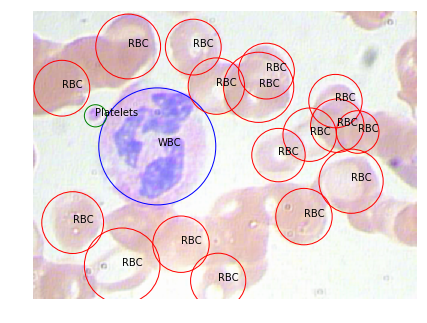

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) #adding X and Y axes from 0 to 1 for each direction 
plt.axis('off')

image = image_aug
#plt.imshow(image)


for i in range(len(bbs_aug.bounding_boxes)):
    after = bbs_aug.bounding_boxes[i]
    xmin = after.x1
    xmax = after.x2
    ymin = after.y2
    ymax = after.y1
    
    
    width = xmax - xmin
    height = ymax - ymin
    ClassName= after.label
    # assign different color to different classes of objects
    if ClassName == 'RBC':
        ax.annotate('RBC', xy=( (xmax+xmin) / 2,  (ymax+ymin) / 2) )
        #rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = 'r', facecolor = 'none')
        rect = patches.Circle(((xmax+xmin) / 2,  (ymax+ymin) / 2), max(width/2, height/2), edgecolor = 'r', facecolor = 'none')
    elif ClassName == 'WBC':
        ax.annotate('WBC', xy=( (xmax+xmin) / 2,  (ymax+ymin) / 2))
        #rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = 'b', facecolor = 'none')
        rect = patches.Circle(((xmax+xmin) / 2,  (ymax+ymin) / 2), max(width/2, height/2), edgecolor = 'b', facecolor = 'none')
    elif ClassName == 'Platelets':
        ax.annotate('Platelets', xy=( (xmax+xmin) / 2,  (ymax+ymin) / 2))
        #rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = 'g', facecolor = 'none')
        rect = patches.Circle(((xmax+xmin) / 2,  (ymax+ymin) / 2), max(width/2, height/2), edgecolor = 'g', facecolor = 'none')
    else:
        print("nothing")
    
    ax.add_patch(rect)
    #fig.savefig('1.jpg', dpi=90, bbox_inches='tight')
    plt.imshow(image)